<a href="https://colab.research.google.com/github/agustinparada/Fisica_Computacional_I/blob/master/Actividad9/Actividad9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 9***
**José Agustín Parada Peralta**

**Departamento de Física**

**Universidad de Sonora**

In [61]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d 

# ***Primera parte de ejercicios***

Resolver los sistemas de ecuaciones diferenciales siguientes.

***Ejercicio 1***:

Determinar los punto críticos del sistema de ecuaciones diferenciales:

$$ \begin{align*} \frac{dx}{dt}&=y\\ \frac{dy}{dt}&=-x \end{align*} $$

De forma matricial, esto es:

$$ \vec{x}'=\frac{d}{dt} \begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}=A\vec{x}$$

In [62]:
# Obtenemos los eigenvalores de la matriz de coeficientes de la ecuación diferencial.
A=np.array([[0,1],[-1,0]])
eigenval, eigenvec = la.eig(A)
print(eigenval)

[0.+1.j 0.-1.j]


Podemos apreciar que los eigenvalores son de la forma:
$$ \lambda = a\pm bi $$
Específicamente, $a=0$. Además, $tr(A)=0+0=0$. Esto nos dice que el punto crítico del sistema es de tipo:

***CENTRO***.

Ahora procedemos a conseguir el punto crítico en cuestión resolviendo el sistema homogéneo:

$$ A\vec{x}=\vec{0} $$

In [63]:
# Declaramos la matriz b = 0 y resolvemos el sistema homogéneo Ax=0 para determinar puntos críticos
b=np.zeros((2,1))
pcr=la.solve(A,b)
print('x = ',pcr[0],'\n','y = ',pcr[1])

x =  [-0.] 
 y =  [0.]


Entonces concluimos que el punto $(0,0)$ es un punto crítico de tipo centro.

Resolviendo el sistema por transformada de Laplace, obtenemos la solución:

$$ \begin{pmatrix} x \\ y \end{pmatrix}= \begin{pmatrix} c_1\cos{t}+c_2\sin{t} \\ -c_1\sin{t}+c_2\cos{t} \end{pmatrix} $$

Se graficarán algunas soluciones para valores de las constantes $c_1$ y $c_2$.

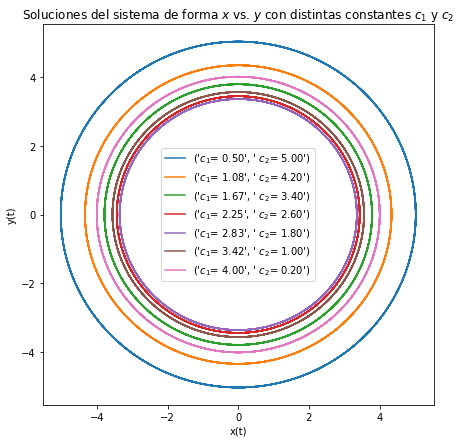

In [64]:
# Definimos la función vectorial de solución del sistema.
def x(t,c1,c2):
  t0=np.zeros((1000,))
  t0=t
  r=[c1*np.cos(t0)+c2*np.sin(t0),-c1*np.sin(t0)+c2*np.cos(t0)]
  return r

# Creamos suficientes puntos de tiempo t y constantes arbitrarias c_1 y c_2
t=np.linspace(0,50,1000)
c1=list(np.linspace(0.5,4,7))
c2=list(np.linspace(5,0.2,7))

#Graficamos las soluciones haciendo variar a las constantes arbitrarias
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Soluciones del sistema de forma $x$ vs. $y$ con distintas constantes $c_1$ y $c_2$')
plt.legend()
plt.show()

***Ejercicio 2***

Determinar los punto críticos del sistema de ecuaciones diferenciales:

$$ \begin{align*} \frac{dx}{dt}&=y\\ \frac{dy}{dt}&=x \end{align*} $$

De forma matricial, esto es:

$$ \vec{x}'=\frac{d}{dt} \begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}=A\vec{x}$$

In [65]:
# Obtenemos los eigenvalores de la matriz de coeficientes del sistema
B = np.array([[0,1],[1,0]])
eigenval, eigenvec=la.eig(A)
eigenval

array([0.+1.j, 0.-1.j])

Los eigen valores de la matriz $A$ del sistema son reales y distintos. Asimismo, si $\lambda_1=1;\; \lambda_2=-1$, entonces vemos que:
$$ \lambda_2 < 0 < \lambda_1 $$
Por lo tanto, el punto crítico del sistema es:

***PUNTO SILLA***

Procedemos ahora a encontrar el punto crítico en cuestión, resolviendo el sistema:
$$A\vec{x}=\vec{0}$$

In [66]:
# Declaramos la matriz b = 0 y resolvemos el sistema homogéneo para 
# encontrar los puntos críticos
b=np.zeros((2,1))
pcr=la.solve(B,b)
print('x = ',pcr[0],'\n','y = ',pcr[1])

x =  [0.] 
 y =  [0.]


Entonces concluimos que el punto $(x, y)=(0, 0)$ es un punto crítico de tipo *Punto silla*

La solución del sistema se ve entonces:

$$ \begin{pmatrix} x \\ y \end{pmatrix}= \begin{pmatrix} c_1e^t-c_2e^{-t} \\ c_1e^{t}+c_2e^{-t} \end{pmatrix} $$

Se graficarán algunas soluciones para valores de las constantes $c_1$ y $c_2$.

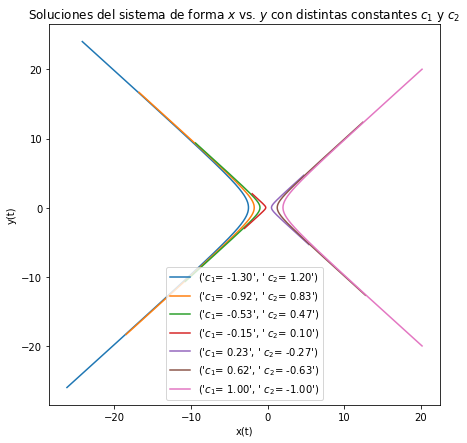

In [67]:
# Definimos la función con la solución del sistema, como se ve arriba
def x1(t,c1,c2):
  r=[c1*np.exp(t)-c2*np.exp(-t), c1*np.exp(t)+c2*np.exp(-t)]
  return r

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase
t=np.linspace(-3,3,500)
c1=list(np.linspace(-1.3,1,7))
c2=list(np.linspace(1.2,-1,7))

# Graficamos el espacio fase de las soluciones
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x1(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Soluciones del sistema de forma $x$ vs. $y$ con distintas constantes $c_1$ y $c_2$')
plt.legend()
plt.show()

***Ejercicio 3***

Determinar los punto críticos del sistema de ecuaciones diferenciales:

$$ \frac{d^2x}{dt^2}+\omega_0^2x = 0;\; \omega_0>0 $$

Ecuación la cual, aplicando el cambio de variable $y=\dfrac{dx}{dt}$, podemos descomponer en un sistema de ecuaciones:

$$ \begin{align*} \frac{dx}{dt}&=y\\ \frac{dy}{dt}&=-\omega_0^2x \end{align*} $$

De forma matricial, esto es:

$$ \vec{x}'=\frac{d}{dt} \begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} 0 & 1 \\ -\omega_0^2 & 0 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}=A\vec{x}$$

Los eigenvalores de la matriz son de la forma $\lambda=a\pm bi$:

$$ \lambda=\pm \omega_0i $$

De donde notamos que $tr(A)=0$ y $a=0$. Por lo tanto, concluimos que el punto crítico en cuestión es tipo ***CENTRO***.

In [68]:
# Definimos arbitrariamente una constante positiva w0 y encontramos los eigenvalores
# de la matriz de coeficientes del sistema
w0=10
C=np.array([[0,1],[w0,0]])
b=np.zeros((2,1))
pcr=la.solve(C,b)
print('x = ',pcr[0],'\n','y = ',pcr[1])

x =  [0.] 
 y =  [0.]


Entonces concluimos que el punto  $(x,y)=(0,0)$  es un punto crítico de tipo *Centro*.

La solución del sistema se ve entonces:

$$ \begin{pmatrix} x \\ y \end{pmatrix}= \begin{pmatrix} c_1\cos{(\omega_0t)}+c_2\sin{(\omega_0t)} \\ -c_1\sin{(\omega_0t)}+c_2\cos{(\omega_0t)} \end{pmatrix} $$

Se graficarán algunas soluciones para valores de las constantes $c_1$ y $c_2$.

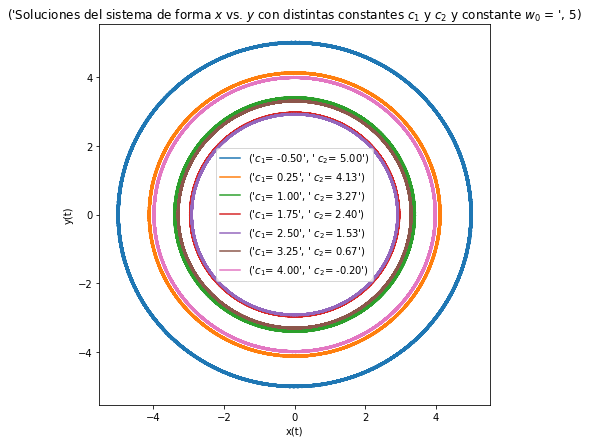

In [69]:
# Definimos la función con la solución del sistema, como se ve arriba
def x(t,w0,c1,c2):
  r=[c1*np.cos(w0*t)+c2*np.sin(w0*t),-c1*np.sin(w0*t)+c2*np.cos(w0*t)]
  return r

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase
w0=5
t=np.linspace(-10,50,1000)
c1=list(np.linspace(-0.5,4,7))
c2=list(np.linspace(5,-0.2,7))

# Graficamos el espacio fase de las soluciones
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x(t,w0,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(('Soluciones del sistema de forma $x$ vs. $y$ con distintas constantes $c_1$ y $c_2$ y constante $w_0$ = ',w0))
plt.legend()
plt.show()

**Ejercicio 4.** 

\begin{eqnarray*}
\frac{d x}{d t} & = & -2 x  \\
\frac{d y}{dt } & = &  2 z  \\
\frac{d z}{dt } & = &  - 2 y  \\
\end{eqnarray*}

Podemos notar que la variable $x$ es independiente de las otras dos, funcionando como un sistema a parte, uno conformad por una sola ecuación diferencial. Por lo tanto, la clasificación del punto crítico puede obtenerse mediante el subsistema que lo componen $y$ y $z$.

In [70]:
# Obtenemos por separado los eigenvalores de la matriz del sistema dependiente de yz del sistema xyz
D = np.array([[-2,0,0],[0,0,2],[0,-2,0]])
D1= np.array([[0,-2],[2,0]])
eigenval, eigenvec = la.eig(D)
print(eigenval)
eigenval, eigenvec = la.eig(D1)
print(eigenval)

[ 0.+2.j  0.-2.j -2.+0.j]
[0.+2.j 0.-2.j]


In [71]:
# Resolvemos el sistema homogéneo para encontrar puntos críticos
b=np.zeros((3,1))
pcr=la.solve(D,b)
pcr

array([[-0.],
       [-0.],
       [ 0.]])

Con lo anterior, podemos concluir que el punto crítico en cuestión corresponde a un centro en el plano $YZ$ y el punto se encuentra en $(0,0,0)$

Por ser la ecuación de $x$ independiente de $y$ y $z$, las soluciones en general se miran:

$$ \vec{x}=\begin{pmatrix} c_1e^{-2t} \\ c_2\cos{2t}+c_3\sin{2t} \\ -c_2\sin{2t}+c_3\cos{2t} \end{pmatrix} $$

Graficaremos el espacio fase en $\mathbb{R}^3$ especificando algunos valores de las constantes $c_i;\; i=1,2,3$.

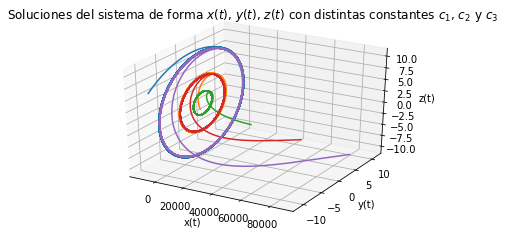

In [72]:
# Definimos la función con la solución del sistema, como se ve arriba
def x(t,c1,c2,c3):
  r=[c1*np.exp(-2*t), c2*np.cos(2*t)+c3*np.sin(2*t), -c2*np.sin(2*t)+c3*np.cos(2*t)]
  return r

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase 3D
t=np.linspace(-5,50,1000)
c1=list(np.linspace(-0.5,4,5))
c2=list(np.linspace(5,-0.2,5))
c3=list(np.linspace(-10,11,5))

# Graficamos el espacio fase 3D de las soluciones
plt.figure()
ax=plt.axes(projection='3d')
for c,d,e in zip(c1,c2,c3):
  v=x(t,c,d,e)
  s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.title('Soluciones del sistema de forma $x(t)$, $y(t)$, $z(t)$ con distintas constantes $c_1$, $c_2$ y $c_3$')

plt.show()

**Ejercicio 5.** 

\begin{eqnarray*}
\frac{d x}{d t} & = & - x + z  \\
\frac{d y}{dt } & = &  3 y  \\
\frac{d z}{dt } & = &  - x - z \\
\end{eqnarray*}

En forma matricial:

$$ \frac{d}{dt}\begin{pmatrix} x\\ y\\ z \end{pmatrix}=\begin{pmatrix} -1 & 0 & 1\\ 0 & 3 & 0\\ -1 & 0 & -1 \end{pmatrix} \begin{pmatrix} x\\ y\\ z \end{pmatrix} $$

De manera similar al ejercicio anterior, podemos observar que la variable $y$ es independiente de las otras 2.

El sistema $x, z$:

$$ \frac{d}{dt}\begin{pmatrix} x\\ z \end{pmatrix}=\begin{pmatrix} -1 & 1\\  -1 & -1 \end{pmatrix} \begin{pmatrix} x\\ z \end{pmatrix}=A\vec{x} $$

In [73]:
# Obtenemos por separado los eigenvalores de la matriz del sistema dependiente de xz del sistema xyz
E=np.array([[-1,0,1],[0,3,0],[-1,0,-1]])
eigenval, eigenvec = la.eig(E)
print(eigenval)
E1=np.array([[-1,1],[-1,-1]])
eigenval, eigenvec = la.eig(E1)
print(eigenval)

[-1.+1.j -1.-1.j  3.+0.j]
[-1.+1.j -1.-1.j]


Los eigenvalores de la matriz del sistema $XZ$ son de la forma:
$$ \lambda = a\pm bi = -1\pm i $$
Además $tr(A)=-2 < 0$ y $a=-1< 0< 1 = b$

Por lo tanto, podemos concluir que el punto crítico del sistema de ecuaciones es un ***foco espiral estable***.

La solución del sistema viene dada por:

$$ \begin{pmatrix} x\\ y\\ z \end{pmatrix}=\begin{pmatrix} e^{-t} (c_1\sin{t}+c_3\cos{t})\\ c_2e^{3t} \\ e^{-t}(c_3\sin{t}-c_1\cos{t}) \end{pmatrix} $$

Graficaremos el espacio fase para distintos valores de las constantes $c_k;\; k=1,2,3$

In [74]:
# Resolvemos el sistema homogéneo para encontrar puntos críticos
b=np.zeros((3,1))
pcr=la.solve(E,b)
pcr

array([[-0.],
       [ 0.],
       [-0.]])

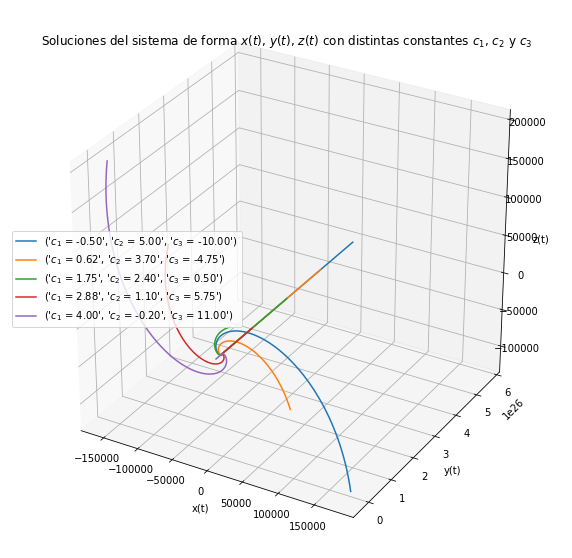

In [75]:
# Definimos la función con la solución del sistema, como se ve arriba
def x(t,c1,c2,c3):
  r=[np.exp(-t)*(c1*np.sin(t)+c3*np.cos(t)),c2*np.exp(3*t) ,np.exp(-t)*(c3*np.sin(t)-c1*np.cos(t)) ]
  return r

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase 3D
t=np.linspace(-10,20,1000)
c1=list(np.linspace(-0.5,4,5))
c2=list(np.linspace(5,-0.2,5))
c3=list(np.linspace(-10,11,5))

# Graficamos el espacio fase 3D de las soluciones
fig=plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
for c,d,e in zip(c1,c2,c3):
  v=x(t,c,d,e)
  s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:],label=('$c_1$ = {:.2f}'.format(c),'$c_2$ = {:.2f}'.format(d),'$c_3$ = {:.2f}'.format(e)))
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.title('Soluciones del sistema de forma $x(t)$, $y(t)$, $z(t)$ con distintas constantes $c_1$, $c_2$ y $c_3$')
ax.legend(loc='center left')
plt.show()


# ***Segunda parte de serie de problemas***

Resolver ls problemas de condición inicial

***Ejercicio 6***


\begin{eqnarray*}
\frac{d x}{d t} & = & - x  \\
\frac{d y}{dt } & = &  x + 2 y  \\
x(0) = 0, & & y(0) = 3
\end{eqnarray*}

El sistema se puede ver, matricialmente, como:

$$ \frac{d}{dt}\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -1 & 0 \\ 1 & 2 \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} -x \\ x+2y \end{pmatrix} $$

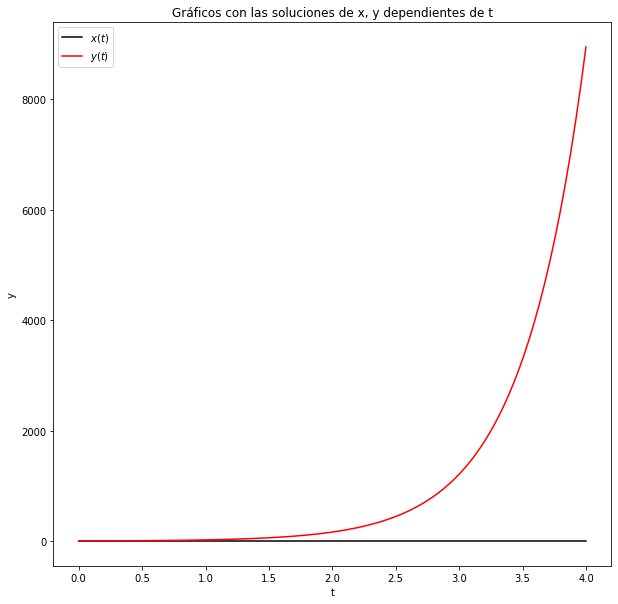

In [76]:
# Definimos la función dx/dt para la solución del sistema por medio de scipy.integrate
def f6(y, t):
  x, v = y
  return [-x, x+2*v]

# Definimos los puntos de tiempo para la solución, al igual que las condiciones iniciales del sistema
t=np.linspace(0,4,100)
y0=[0,3]

# Graficamos ambas soluciones en función del tiempo (x v. t)
plt.figure(figsize=(10,10))
y=odeint(f6,y0,t)
plt.plot(t,y[0:,0],'k',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.title('Gráficos con las soluciones de x, y dependientes de t')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

**Ejercicio 7:**

\begin{eqnarray*}
\frac{d x}{d t} & = & 2 x + y  \\
\frac{d y}{dt } & = &  x +  y  \\
x(1) = 1, & & y(1) = 1
\end{eqnarray*}

Matricialmente, el sistema se ve:

$$ \frac{d}{dt}\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 2 & 1 \\ 1 & 1 \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} 2x+y \\ x+y \end{pmatrix} $$

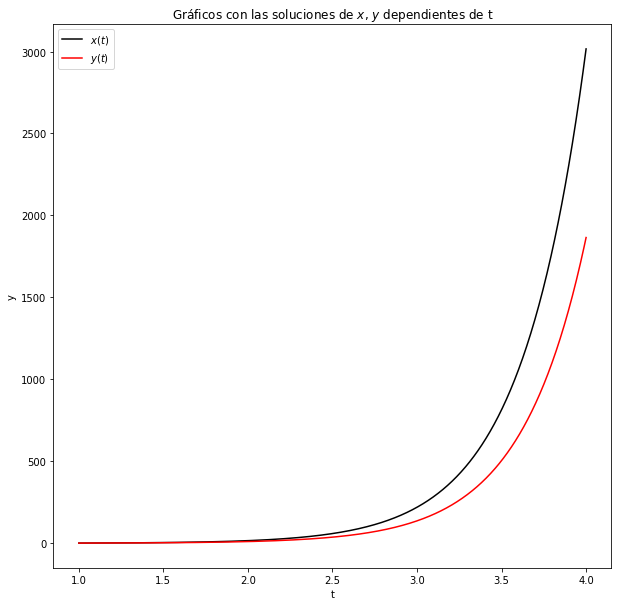

In [77]:
# Definimos la función dx/dt para la solución del sistema por medio de scipy.integrate
def f7(y, t):
  x, v = y
  return [2*x+v, x+v]

# Definimos los puntos de tiempo para la solución, al igual que las condiciones iniciales del sistema
t=np.linspace(1,4,1000)
y0=[1,1]

# Graficamos ambas soluciones en función del tiempo (x v. t)
plt.figure(figsize=(10,10))
y=odeint(f7,y0,t)
plt.plot(t,y[0:,0],'k',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.title('Gráficos con las soluciones de $x$, $y$ dependientes de t')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

**Ejercicio 8:**

\begin{eqnarray*}
\frac{d \vec{x}}{d t} & = & A \vec{x}  \\
x(0) & = & (0,3) \\
A & = & \begin{bmatrix}
0 & 3 \\
1 & -2 \\
\end{bmatrix}
\end{eqnarray*}

El sistema, vectorialmente, podemos concebirlo como:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} 0 & 3 \\ 1 & -2 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}=\begin{pmatrix} 3x_2 \\ x_1-2x_2 \end{pmatrix} $$

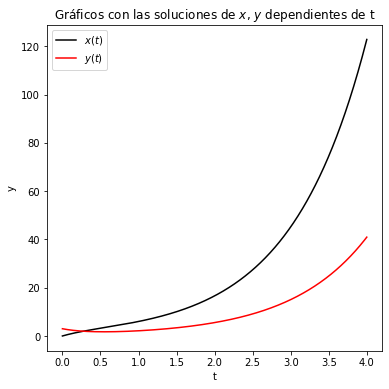

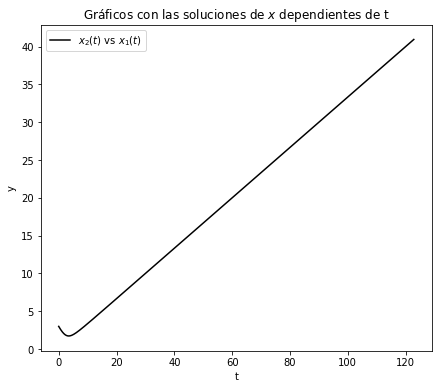

In [78]:
# Definimos la función dx/dt para la solución del sistema por medio de scipy.integrate
def f8(y, t):
  x1, x2 = y
  return [ 3*x2 , x1-2*x2 ]

# Definimos los puntos de tiempo para la solución, al igual que las condiciones iniciales del sistema
t=np.linspace(0,4,1000)
y0=[0,3]

# Graficamos ambas soluciones en función del tiempo (x v. t)
plt.figure(figsize=(6,6))
y=odeint(f8,y0,t)
plt.plot(t,y[0:,0],'k',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.title('Gráficos con las soluciones de $x$, $y$ dependientes de t')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

# Graficamos, también el espacio fase de las soluciones.
plt.figure(figsize=(7,6))
y=odeint(f8,y0,t)
plt.plot(y[0:,0],y[0:,1],'k',label='$x_2(t)$ vs $x_1(t)$')
plt.title('Gráficos con las soluciones de $x$ dependientes de t')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

**Ejercicio 9:**

\begin{eqnarray*}
\frac{d\vec{x}}{d t} & = & A \vec{x}  \\
x(0) & = & (0,-b,b) \\
A & = & \begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix}
\end{eqnarray*}

Entonces, vectorialmente:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =\begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 2x_1 \\ -x_2 \\ 2x_2-3x_3 \end{pmatrix} $$

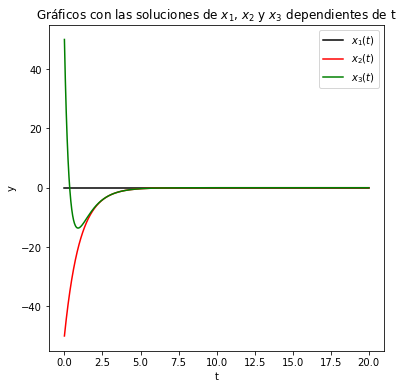

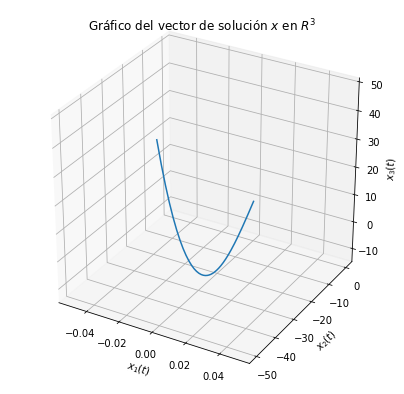

In [79]:
# Definimos la función dx/dt para la solución del sistema por medio de scipy.integrate
def f9(y, t):
  x1, x2, x3 = y
  return [ 2*x1 , -x2 , 2*x2-3*x3 ]

# Definimos los puntos de tiempo para la solución, al igual que las condiciones iniciales del sistema
t=np.linspace(0,20,1000)
b=50
y0=[0,-b,b]

# Graficamos ambas soluciones en función del tiempo (x v. t)
plt.figure(figsize=(6,6))
y=odeint(f9,y0,t)
plt.plot(t,y[0:,0],'k',label='$x_1(t)$')
plt.plot(t,y[0:,1],'r',label='$x_2(t)$')
plt.plot(t,y[0:,2],'g',label='$x_3(t)$')
plt.title('Gráficos con las soluciones de $x_1$, $x_2$ y $x_3$ dependientes de t')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

# Graficamos, también el espacio fase 3D de las soluciones.
y=odeint(f9,y0,t)
plt.figure(figsize=(7,7))
ax=plt.axes(projection='3d')
ax.plot3D(y[0:,0],y[0:,1],y[0:,2])
ax.set_title('Gráfico del vector de solución $x$ en $R^3$')
ax.set_xlabel('$x_1(t)$')
ax.set_ylabel('$x_2(t)$')
ax.set_zlabel('$x_3(t)$')
plt.show()

***Ejercicio 10***

\begin{eqnarray*}
m_1 x_1^{''} + b_1 x_1^{'}+k_1 (x_1-L_1)-k_2(x_2-x_1-L_2) & = & 0 \\
m_2 x_2^{''} + b_2 x_2^{'}+k_2(x_2-x_1-L_2) & = & 0 \\
\end{eqnarray*}

Suponer que $L_1=L_2=1$ y que las masas son iguales $m_1=m_2=1$.

Hacemos los cambios de variable:

$$ y_1=\frac{dx_1}{dt};\; y_2=\frac{dx_2}{dt} $$

Lo que nos queda:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ y_1 \\ y_2 \end{pmatrix} = \begin{pmatrix} 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1\\ -(k_1+k_2) & k_2 & -b_1 & 0 \\ k_2 & -k_2 & 0 & b_2 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \\ y_1 \\ y_2 \end{pmatrix} + \begin{pmatrix} 0 \\ 0 \\ k_1-k_2 \\ k_2 \end{pmatrix}= P\vec{x}+\vec{u} $$

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ y_1 \\ y_2 \end{pmatrix} = \begin{pmatrix} y_1 \\ y_2 \\ -(k_1+k_2)x_1+k_2x_2-b_1y_1+(k_1-k_2) \\ k_2x_1-k_2x_2-b_2y_2+k_2 \end{pmatrix}  $$

**10.1, 10.2**

Caso sin fricción:

$$ b_1 = b_2 = 0;\; k_1=6,\: k_2 = 4 $$

Se obtendrán los eigenvalores de P, con el objetivo de clasificar los puntos críticos del sistema de ecuaciones. Se graficará además la solución del sistema (para $x_1$ y $x_2$) en el espacio fase.

In [80]:
# Definimos la función derivada dx/dt para hacerla argumento de la función de solución scipy.odeint
def f(y, t, k1, k2, b1, b2):
  x1, x2, v1, v2 = y
  dxdt=[v1, v2, -(k1+k2)*x1+k2*x2-b1*v1+k1-k2, k2*x1-k2*x2-b2*v2+k2]
  return dxdt
k1=6
k2=4
b1 = b2 = 0
y0=[1,4,0,0]

# Obtenemos los eigenvalores de la matriz de coeficientes (obviando el vector de términos extra)
E=np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,b2]])
eigenval, eigenvec = la.eig(E)
print(eigenval)

[-7.84812828e-18+3.46410162j -7.84812828e-18-3.46410162j
  3.56037039e-17+1.41421356j  3.56037039e-17-1.41421356j]


Los eigenvalores poseen una parte real muy aproximada a 0, pero no completamente 0. Se puede ver que $x_1$ y $x_2$ poseen ciertos puntos críticos de naturaleza espiral estable. Esto se puede ver debido a que:
$$ a < 0 < b $$

Sin embargo, los puntos críticos respecto de las velocidades $y_1$ y $y_2$ tienen naturaleza de tipo espiral inestable debido a que:
$$ b < 0 < a $$

Dado que no es posible visualizar adecuadamente un espacio de más de cuatro dimensiones, se presenta el espacio fase reducido del sistema respecto (únicamente) de $x_1$ y $x_2$.

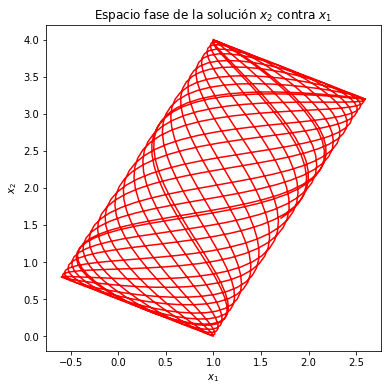

In [81]:
# Definimos las condiciones y las constantes a utilizar
# También aplicamos la función odeint para resolver el sistema planteado con anterioridad
t=np.linspace(0,50,1000)
k1=6
k2=4
b1 = b2 = 0
y0=[1,4,0,0]
y=odeint(f,y0,t,args=(k1, k2, b1, b2))

# Graficamos el espacio fase delimitado
plt.figure(figsize=(6,6))
plt.plot(y[0:,0],y[0:,1],color='r')
plt.title('Espacio fase de la solución $x_2$ contra $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

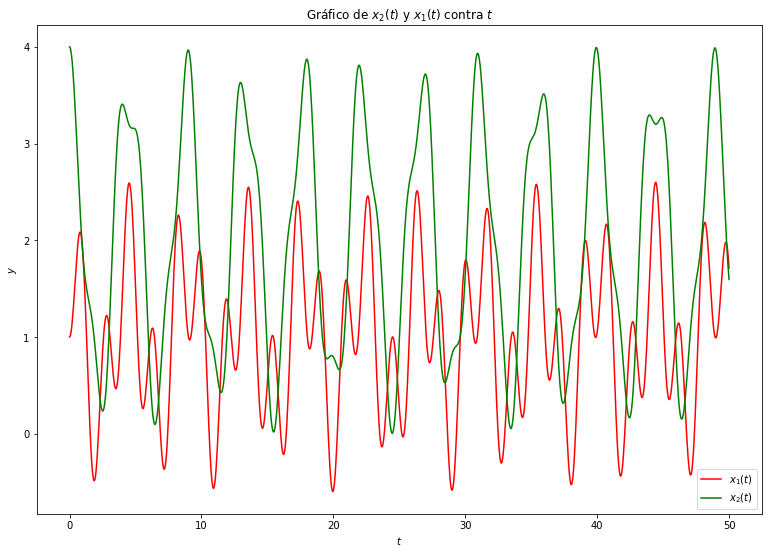

In [82]:
# Graficamos las soluciones del sistema contra el tiempo
plt.figure(figsize=(13,9))
plt.plot(t,y[0:,0],color='r',label='$x_1(t)$')
plt.plot(t,y[0:,1],color='g',label='$x_2(t)$')
plt.title('Gráfico de $x_2(t)$ y $x_1(t)$ contra $t$')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()

**10.3**

Ahora hay fricción, mientras los valores de las constantes de resorte se mantienen igual.

$$ b_1=0.1 $$
$$ b_2=0.2 $$

In [83]:
# Definimos las condiciones y las constantes a utilizar
# También aplicamos la función odeint para resolver el sistema planteado con anterioridad, cambiando constantes de fricción
def f(y, t, k1, k2, b1, b2):
  x1, x2, v1, v2 = y
  dxdt=[v1, v2, -(k1+k2)*x1+k2*x2-b1*v1+k1-k2, k2*x1-k2*x2-b2*v2+k2]
  return dxdt
k1=6
k2=4
b1 = 0.1
b2 = 0.2
y0=[1,4,0,0]

#Obtenemos los eigenvalores de la matriz de coeficientes
E=np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,b2]])
eigenval, eigenvec = la.eig(E)
print(eigenval)

[-0.02012662+3.46155525j -0.02012662-3.46155525j  0.07012662+1.41349145j
  0.07012662-1.41349145j]


De manera similar al caso anterior, se ve que $x_1$ y $x_2$ tienen puntos críticos con una naturaleza de espiral estable mayormente notable, dado que:
$$ a < 0 < b $$


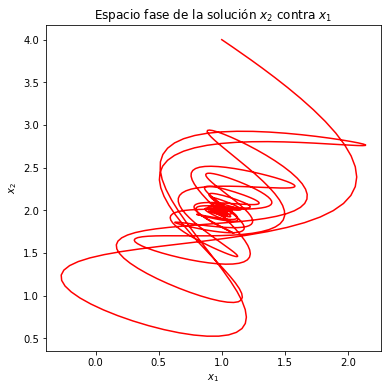

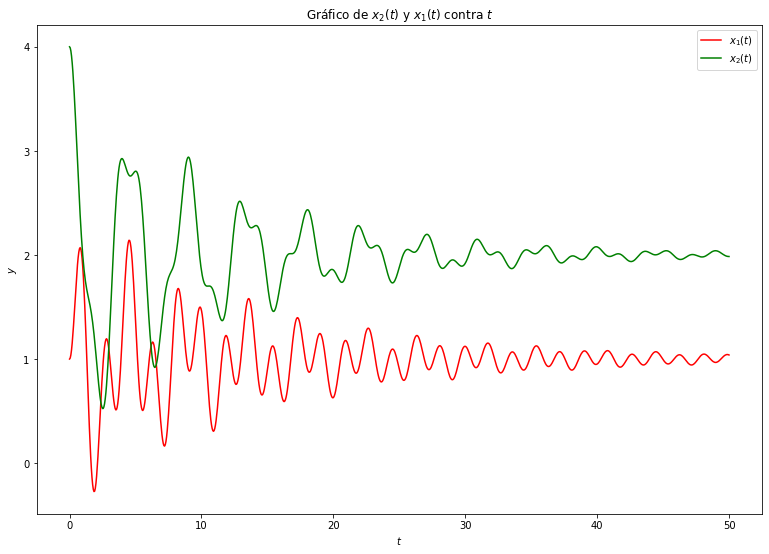

In [84]:
# Definimos y generamos las condiciones necesarias para la resolución del sistema de ecuaciones diferenciales
t=np.linspace(0,50,1000)
k1=6
k2=4
b1 = 0.1
b2 = 0.2
y0=[1,4,0,0]

#Resolvemos el sistema
y=odeint(f,y0,t,args=(k1, k2, b1, b2))

#Graficamos el espacio fase delimitado
plt.figure(figsize=(6,6))
plt.plot(y[0:,0],y[0:,1],color='r')
plt.title('Espacio fase de la solución $x_2$ contra $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# Graficamos las soluciones contra tiempo
plt.figure(figsize=(13,9))
plt.plot(t,y[0:,0],color='r',label='$x_1(t)$')
plt.plot(t,y[0:,1],color='g',label='$x_2(t)$')
plt.title('Gráfico de $x_2(t)$ y $x_1(t)$ contra $t$')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()

Del espacio fase podemos apreciar el comportamiento convergente de $x_1$ y $x_2$.

No tan claramente se puede apreciar en el espacio fase sin fricción. Pues al hacer $t\to \infty$ el espacio se llena de puntos sin apreciar una clara convergencia.